In [1]:
#Bütikofer Kevin, Charles-Lewis Jaggi

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
textfile = open('ex1-data-train.csv')
data = []
for line in textfile:
    row_data = line.strip("\n").split(",")
    for i, item in enumerate(row_data):
        try:
            row_data[i] = float(item)
        except ValueError:
            pass
    data.append(row_data)
data = np.array(data)

In [3]:
textfile = open('ex1-data-test.csv')
data_test = []
for line in textfile:
    row_data = line.strip("\n").split(",")
    for i, item in enumerate(row_data):
        try:
            row_data[i] = float(item)
        except ValueError:
            pass
    data_test.append(row_data)
data_test = np.array(data_test)

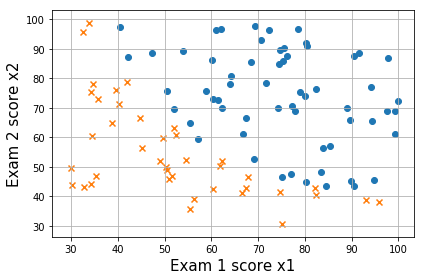

In [4]:
fig, ax = plt.subplots()
passed = np.array([i for i in data if i[2] == 1])
failed = np.array([i for i in data if i[2] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='o')
ax.scatter(failed[:,0], failed[:,1], marker='x')

ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

In [5]:
d = data_test[:,[0,1]]
result = []
for row in d:
    result.append(np.random.randint(0,2))
    
print(result)

[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]


In [6]:
score = np.sum(result == data_test[:,2])
print(score / len(result) * 100,"%")

52.0 %


In [7]:
#prediction with Knn

def getDist(p1, p2):
    return np.sqrt(np.square(p1[0]-p2[0]) + np.square(p1[1]-p2[1]))
    
bestk = 1
bestScore = 0
for k in range(1, 8):
    resultKnn = []
    for row in d:
        distances = []
        for model in data:
            distances.append(getDist(row, [model[0], model[1]]))

        # get the array with the k smallest value at beginning
        indices = np.argpartition(distances, k)[:k]
        
        # get array of 2 stored value the nearest to current point
        n = [data[i][2] for i in indices[:k]]

        # if egal the exam is passed
        non_zero = np.count_nonzero(n)
        if len(n) - non_zero > non_zero:
            resultKnn.append(0)
        else:
            resultKnn.append(1)
            
    score = np.sum(resultKnn == data_test[:,2]) / len(resultKnn) * 100
    if score > bestScore:
        bestScore = score
        bestk = k
    print(score,"%")   
    
print("best score of ", bestScore,"% is obtained with k =", bestk )

96.0 %
99.0 %
97.0 %
91.0 %
92.0 %
90.0 %
91.0 %
best score of  99.0 % is obtained with k = 2
